# Projeto Genoma Humano


> **Prof.: Douglas H. S. Abreu**


**Alunos**: 

Augusto César Rodrigues Lima

Chrystian Arriel Amaral

Henrique Silva Rabelo

**Turma**: 14A

**Link do repositório GitHub:** https://github.com/augustolimald/cpa

# Funções Auxiliares



## Importações e Variáveis globais

In [1]:
import numpy as np

bases = ['A', 'C', 'G', 'T']

## Gerar Fitas Aleatórias

In [2]:
import random

def getRandomBase():
  index = random.randint(0, len(bases) - 1)
  return bases[index]


def generateStrand(size):
  strand = ''

  for i in range(size):
    strand += getRandomBase()

  return strand

## Tempo de Execução

In [3]:
import time

def currentTime():
  return round(time.time() * 1000)

def calculateExecutionTime(strand1, strand2, algorithm):
  startTime = currentTime()
  strand = algorithm(strand1, strand2)
  endTime = currentTime()

  executionTime = endTime - startTime

  return executionTime

## Gerar Gráficos

In [4]:
import matplotlib.pyplot as plt

# Dataset Format
# [
#    {
#       label: 'string',
#       color: 'string',
#       xarray: [number],
#       yarray: [number]
#    } 
# ]

def generateGraph(title, xlabel, ylabel, dataset):
  for data in dataset:
    plt.plot(np.array(data['xarray']), np.array(data['yarray']), label=data['label'], color=data['color'])

  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.legend()
  plt.show()

# Implementação

## Métodos Auxiliares

In [5]:
import itertools

def matchSubsequence(strand, subsequence):
  strandIndex = 0

  for base in subsequence:
    found = False
    
    while (strandIndex < len(strand)):
      if (strand[strandIndex] == base):
        found = True
        strandIndex += 1
        break

      strandIndex += 1

    if not found:
      return False

  return True

## Força Bruta

### Versão 1
Sempre verifica todas as entradas

In [6]:
def getBiggestSubsequenceBruteForceV1(strand1, strand2):
  biggestSubsequence = ''

  for size in range(1, len(strand1)):
    array = list(itertools.combinations(strand1, size))
    for item in array:
      subsequence = ''.join(item)
    
      if len(subsequence) > len(biggestSubsequence) and matchSubsequence(strand2, subsequence):
        biggestSubsequence = subsequence           

  return biggestSubsequence

### Versão 2
Executa no ordem descrescente

Só executa até encontrar a maior

In [7]:
def getBiggestSubsequenceBruteForceV2(strand1, strand2):
  for size in range(len(strand1), 1, -1):
    array = list(itertools.combinations(strand1, size))

    for item in array:
      subsequence = ''.join(item)
      
      if matchSubsequence(strand2, subsequence):
        return subsequence

  return ''

strand = getBiggestSubsequenceBruteForceV2('ACCGGTCGAGTGCGCGGAAGCCGGCCGAA', 'GTCGTTCGGAATGCCGTTGCTCTGTAAA')
print(strand == 'GTCGTCGGAAGCCGGCCGAA')

True


## Programação Dinâmica

In [8]:
def getResult(b, x, i, j, result):
  if i == 0 or j == 0:
    return result
  if b[i][j] == '\\':
    return getResult(b, x, i - 1, j - 1, result) + x[i - 1]
  elif b[i][j] == '|':
    return getResult(b, x, i - 1, j, result)
  else:
    return getResult(b, x, i, j - 1, result)

def getBiggestSubsequenceDynamically(strand1, strand2):
  size1 = len(strand1)
  size2 = len(strand2)

  b = [['.' for j in range(size2 + 1)] for i in range(size1 + 1)]
  c = [[1 for j in range(size2 + 1)] for i in range(size1 + 1)]

  for i in range(1, size1 + 1):
    c[i][0] = 0

  for i in range(0, size2 + 1):
    c[0][i] = 0

  for i in range(1, size1 + 1):
    for j in range(1, size2 + 1):
      if strand1[i - 1] == strand2[j - 1]:
        c[i][j] = c[i - 1][j - 1] + 1
        b[i][j] = '\\'
      elif c[i - 1][j] >= c[i][j - 1]:
        c[i][j] = c[i - 1][j]
        b[i][j] = '|'
      else: 
        c[i][j] = c[i][j - 1]
        b[i][j] = '-'

  return getResult(b, strand1, size1, size2, '')

strand = getBiggestSubsequenceDynamically('ACCGGTCGAGTGCGCGGAAGCCGGCCGAA', 'GTCGTTCGGAATGCCGTTGCTCTGTAAA')
print(strand == 'GTCGTCGGAAGCCGGCCGAA')

True


# Comparação

Calculando com  0 caracteres
Calculando com  1 caracteres
Calculando com  2 caracteres
Calculando com  3 caracteres
Calculando com  4 caracteres
Calculando com  5 caracteres
Calculando com  6 caracteres
Calculando com  7 caracteres
Calculando com  8 caracteres
Calculando com  9 caracteres
Calculando com  10 caracteres
Calculando com  11 caracteres
Calculando com  12 caracteres
Calculando com  13 caracteres
Calculando com  14 caracteres
Calculando com  15 caracteres
Calculando com  16 caracteres
Calculando com  17 caracteres
Calculando com  18 caracteres
Calculando com  19 caracteres
Calculando com  20 caracteres
Calculando com  21 caracteres
Calculando com  22 caracteres
Calculando com  23 caracteres
Calculando com  24 caracteres
Calculando com  25 caracteres
Calculando com  26 caracteres
Calculando com  27 caracteres
Calculando com  28 caracteres


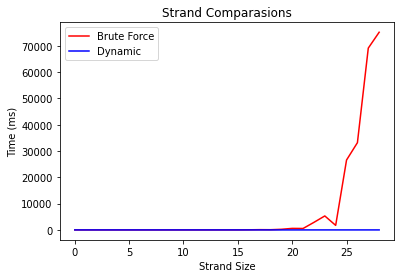

In [9]:
sizes = []
bruteForceTimes = []
dynamicTimes = []

for size in range(29):
  print('Calculando com ', size, 'caracteres')
  sizes.append(size)

  strand1 = generateStrand(size)
  strand2 = generateStrand(size)

  bruteForceTimes.append(calculateExecutionTime(strand1, strand2, getBiggestSubsequenceBruteForceV2))
  dynamicTimes.append(calculateExecutionTime(strand1, strand2, getBiggestSubsequenceDynamically))

generateGraph('Strand Comparasions', 'Strand Size', 'Time (ms)', [
    {
        'label': 'Brute Force',
        'color': 'red',
        'xarray': sizes,
        'yarray': bruteForceTimes
    },
    {
        'label': 'Dynamic',
        'color': 'blue',
        'xarray': sizes,
        'yarray': dynamicTimes
    }
])